In [23]:
import warnings
warnings.filterwarnings("ignore")

# Standard imports
import pandas as pd
import numpy as np

# Data Visuals
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations, product

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr

# Custom Imports
import wrangle

## Acquire and Prepare Zillow

In [2]:
df = wrangle.wrangle_zillow()
df.head(5)

,bedroomcnt,bathroomcnt,square_feet,taxvaluedollarcnt,yearbuilt,taxamount,fips_name
0,4,2.0,3633,296425,2005,6941.39,Los Angeles
1,3,4.0,1620,847770,2011,10244.94,Los Angeles
2,3,2.0,2077,646760,1926,7924.68,Los Angeles
6,3,1.0,1244,169471,1950,2532.88,Los Angeles
7,3,2.0,1300,233266,1950,3110.99,Los Angeles


In [3]:
train, validate, test = wrangle.train_validate_test_split(df)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169459 entries, 1483210 to 1225832
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   bedroomcnt         1169459 non-null  int64  
 1   bathroomcnt        1169459 non-null  float64
 2   square_feet        1169459 non-null  int64  
 3   taxvaluedollarcnt  1169459 non-null  int64  
 4   yearbuilt          1169459 non-null  int64  
 5   taxamount          1169459 non-null  float64
 6   fips_name          1169459 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 71.4+ MB


In [5]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train, validate, test)

In [6]:
train_scaled.head(5)

,bedroomcnt,bathroomcnt,square_feet,taxvaluedollarcnt,yearbuilt,taxamount,fips_name
1483210,0.2,0.272727,0.072759,0.044189,1949,1633.33,Los Angeles
635933,0.4,0.272727,0.074562,0.054043,1964,1711.51,Los Angeles
647772,0.6,0.363636,0.123669,0.378193,1979,8660.46,Orange
1251279,0.2,0.090909,0.011526,0.005963,1920,758.49,Los Angeles
772816,0.4,0.272727,0.040804,0.096488,1972,2528.32,Orange


In [7]:
def wrangle_split_scale():
    
    df = wrangle_zillow()
    train, validate, test = train_validate_test_split(df)
    train_scaled, validated_scaled, test_scaled = scale_data(train, validate, test)
    
    return train_scaled, validate_scaled, test_scaled

### Everything above shows how I created my main function. I combined my wrangle, split and scale functions into one called wrangle_split_scale

In [8]:
train_scaled.head(5)      ## WE will be using scaled data for all of exploration, modeling and testing. 

,bedroomcnt,bathroomcnt,square_feet,taxvaluedollarcnt,yearbuilt,taxamount,fips_name
1483210,0.2,0.272727,0.072759,0.044189,1949,1633.33,Los Angeles
635933,0.4,0.272727,0.074562,0.054043,1964,1711.51,Los Angeles
647772,0.6,0.363636,0.123669,0.378193,1979,8660.46,Orange
1251279,0.2,0.090909,0.011526,0.005963,1920,758.49,Los Angeles
772816,0.4,0.272727,0.040804,0.096488,1972,2528.32,Orange


In [9]:
train.head()   ## The original untouched set is for data visuals only, but apparently for these exercises too

,bedroomcnt,bathroomcnt,square_feet,taxvaluedollarcnt,yearbuilt,taxamount,fips_name
1483210,2,2.0,1733,98022,1949,1633.33,Los Angeles
635933,3,2.0,1766,117631,1964,1711.51,Los Angeles
647772,4,2.5,2665,762659,1979,8660.46,Orange
1251279,2,1.0,612,21957,1920,758.49,Los Angeles
772816,3,2.0,1148,202092,1972,2528.32,Orange


In [10]:
import explore

#### Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

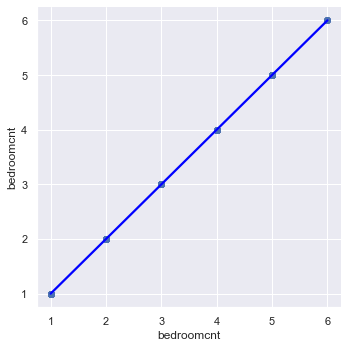

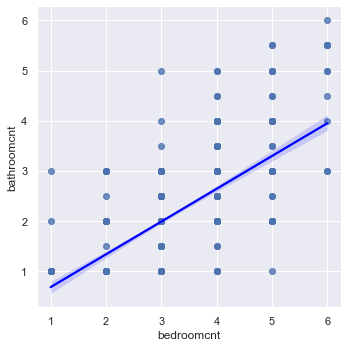

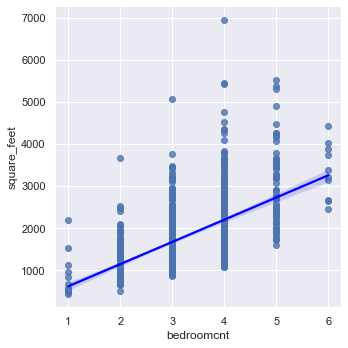

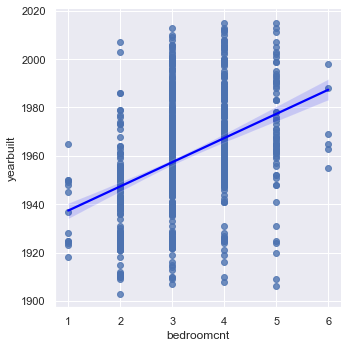

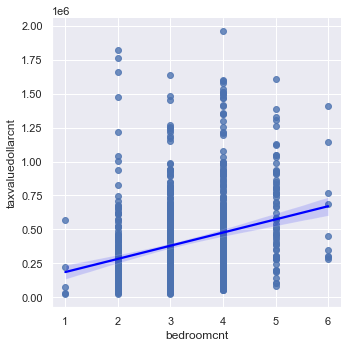

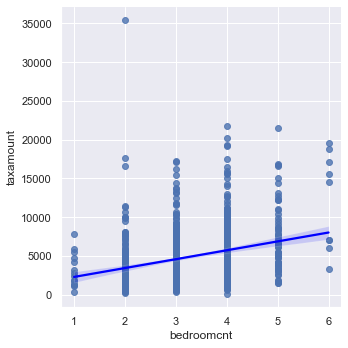

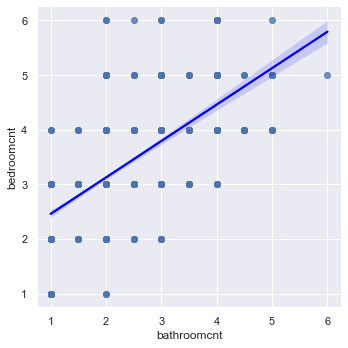

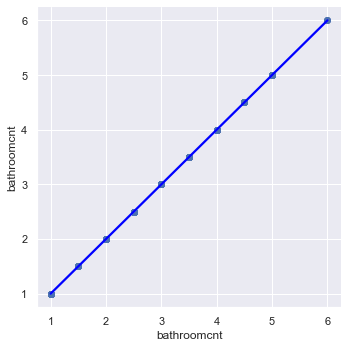

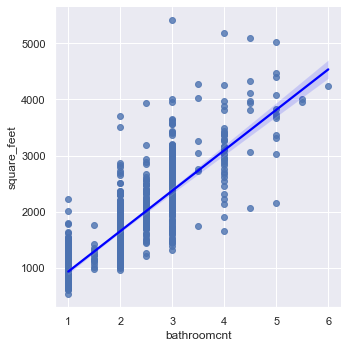

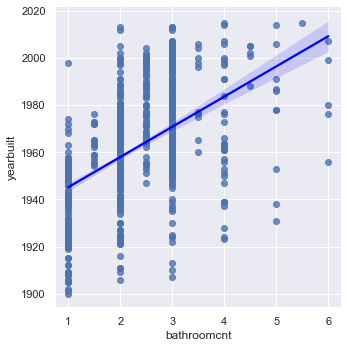

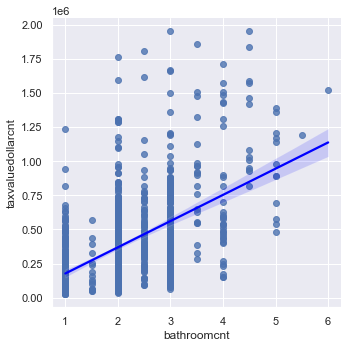

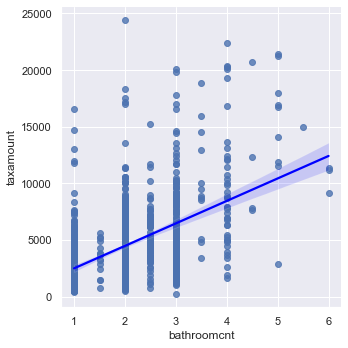

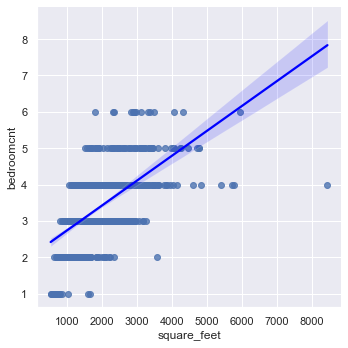

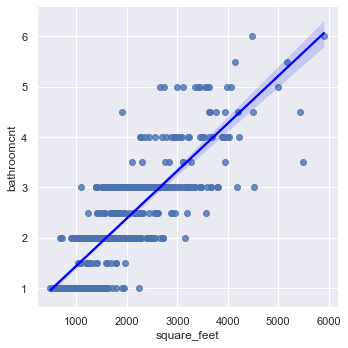

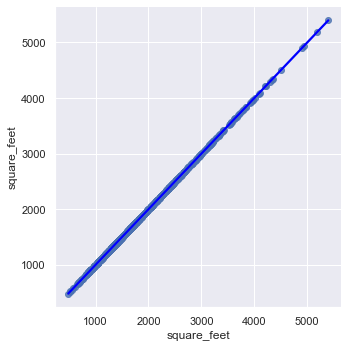

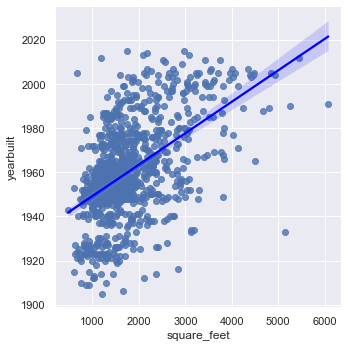

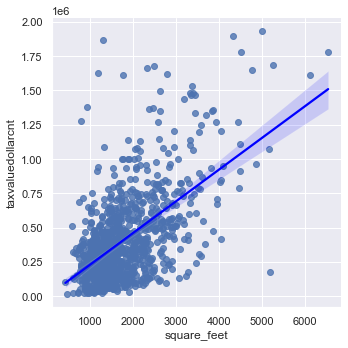

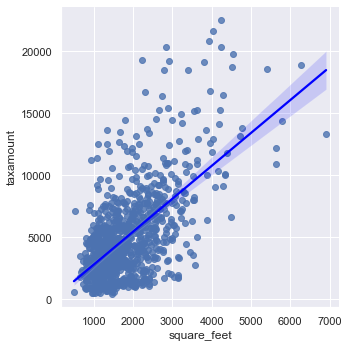

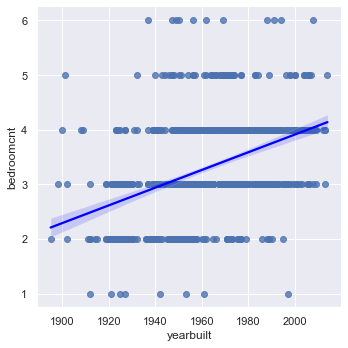

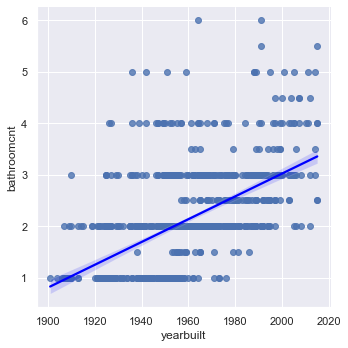

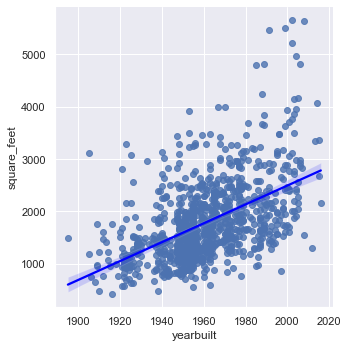

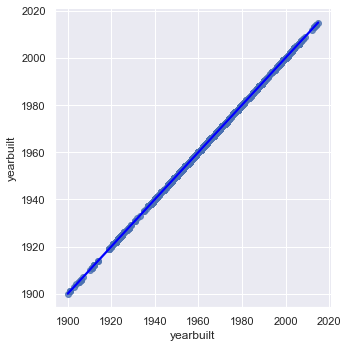

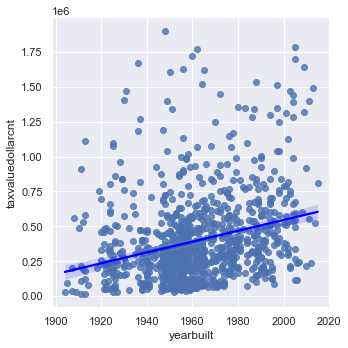

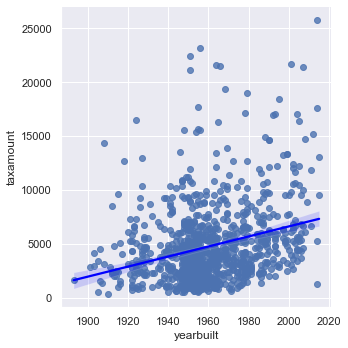

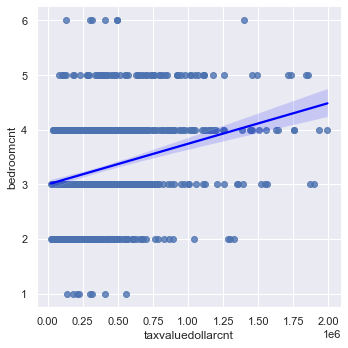

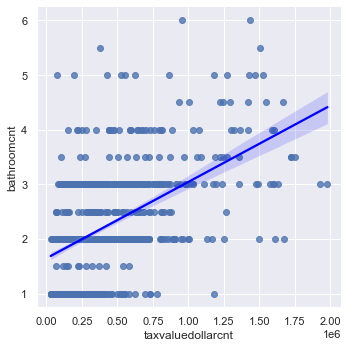

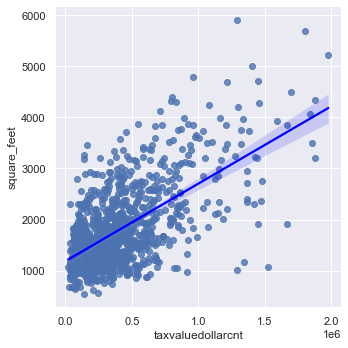

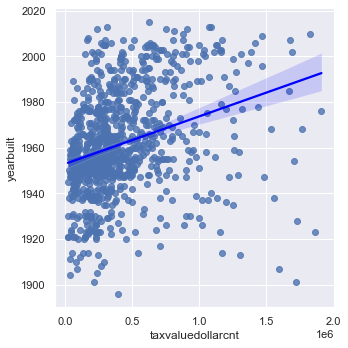

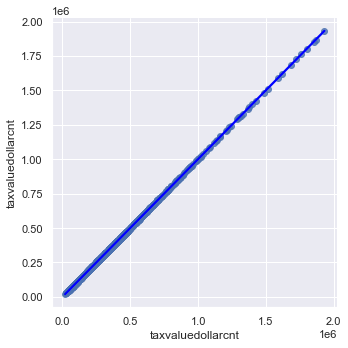

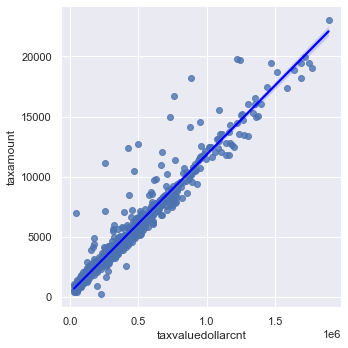

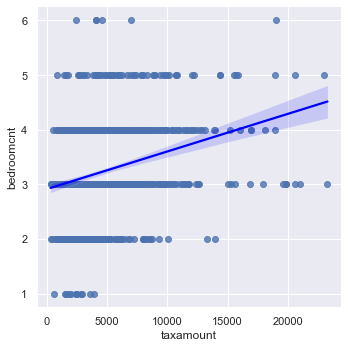

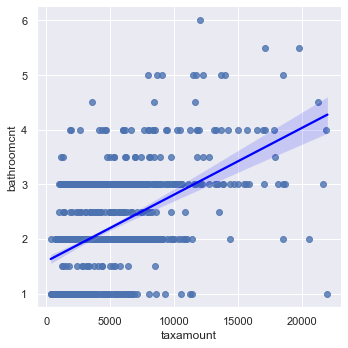

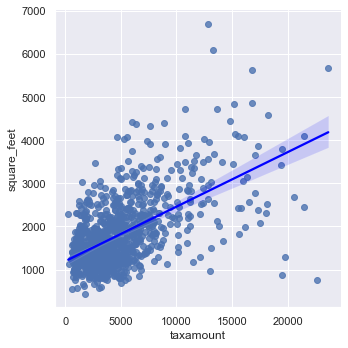

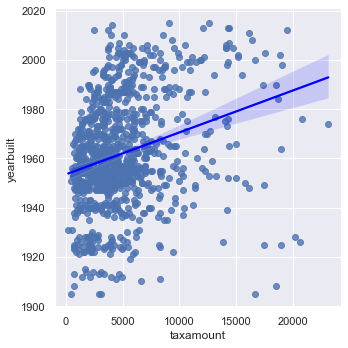

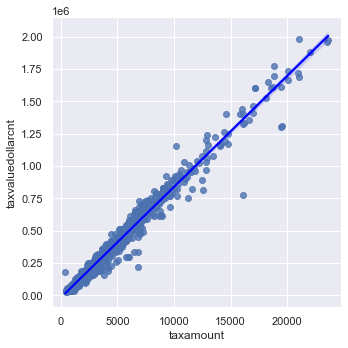

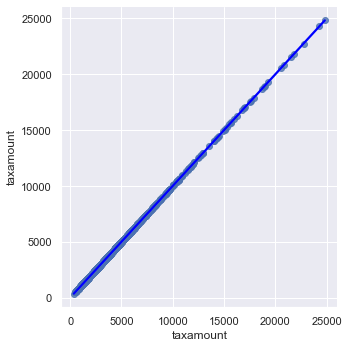

In [15]:
df = explore.plot_variable_pairs(train)

#### Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

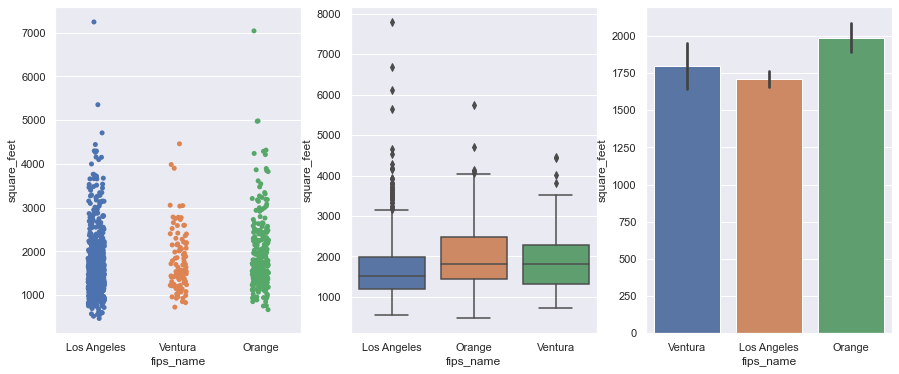

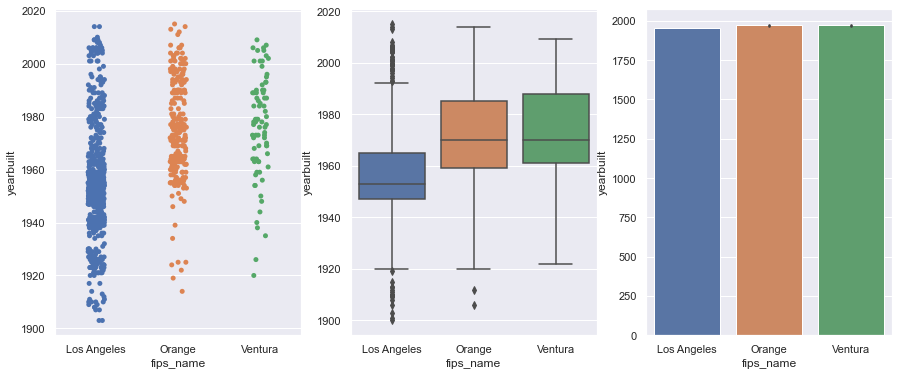

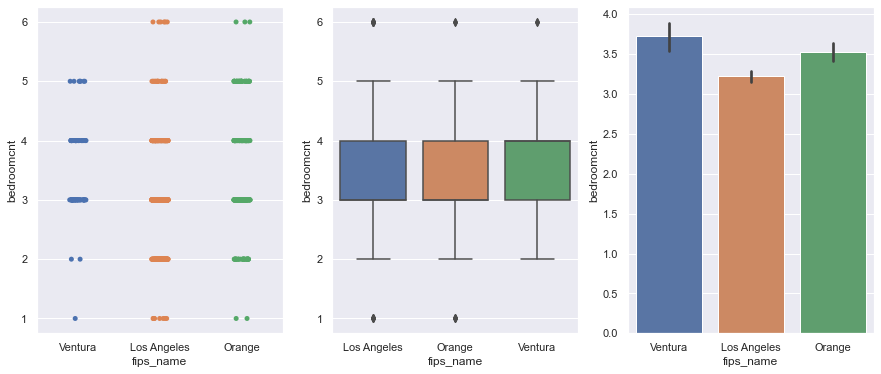

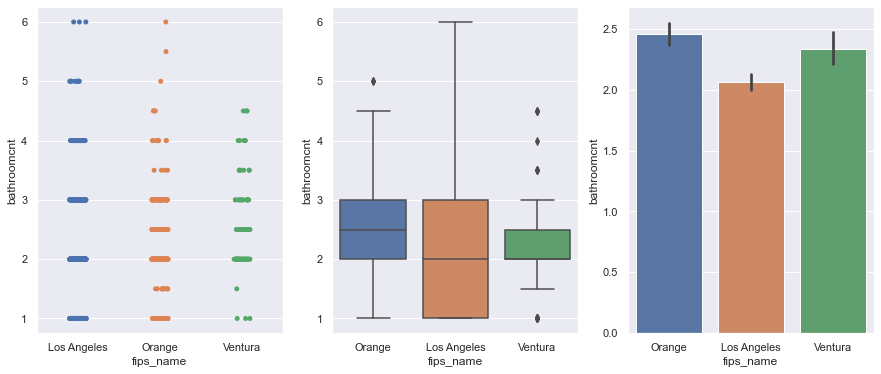

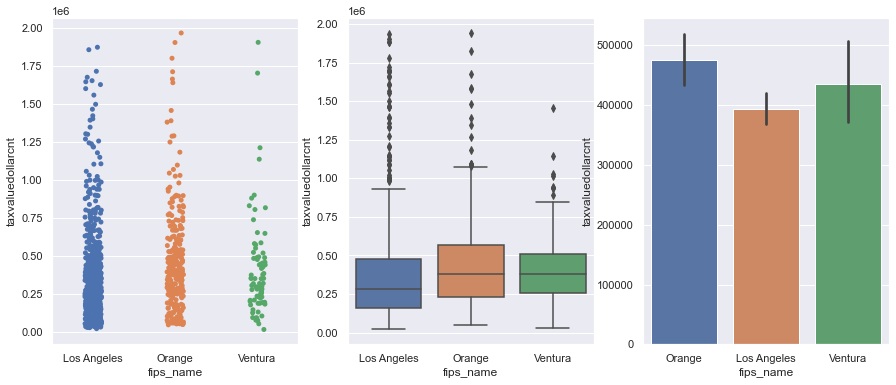

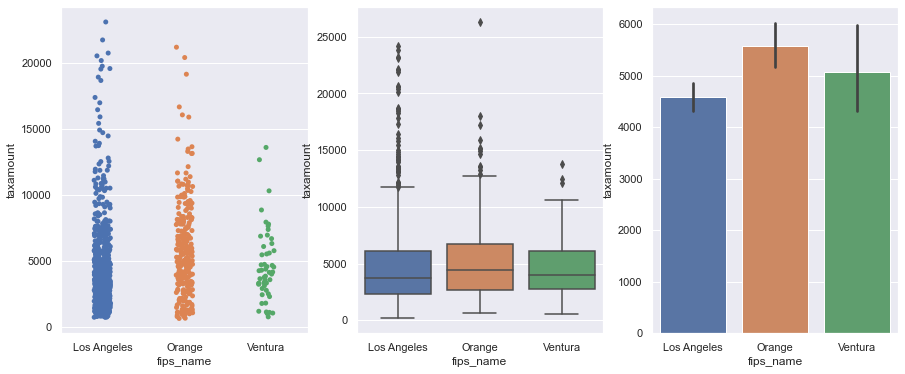

In [16]:
df = explore.plot_categorical_and_continuous_vars(train)

 #### Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [13]:
## import explore  functions are now imported to py file, in their place is just me calling them

#### Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [19]:
target = ['taxvaluedollarcnt']
features = ['bedroomcnt','bathroomcnt','square_feet','yearbuilt','taxamount']

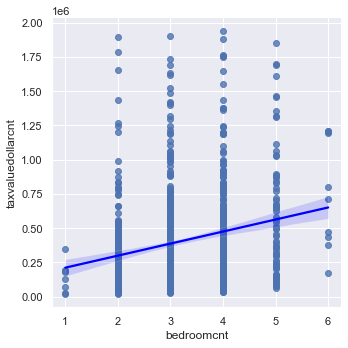

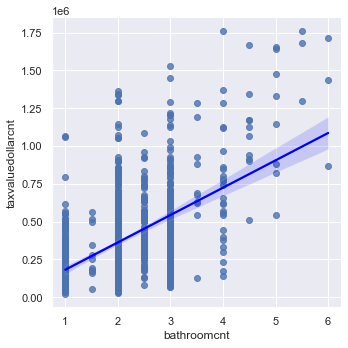

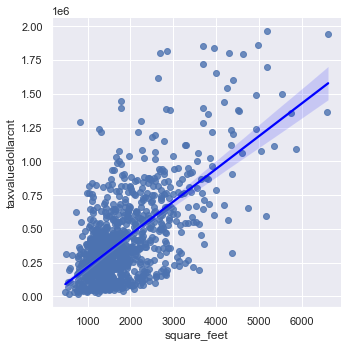

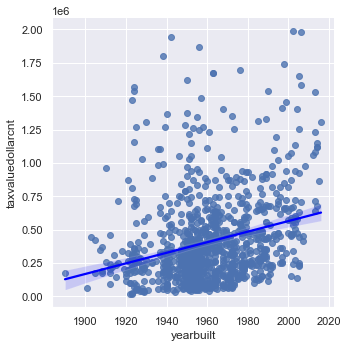

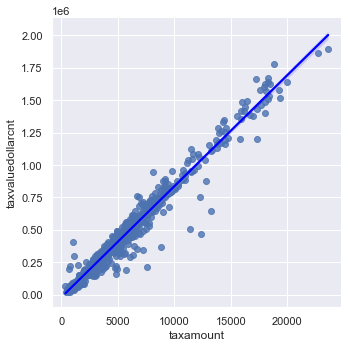

In [32]:
## Look at all categories compared to target variable

explore.plot_variable_pairs(train, columns_y=['taxvaluedollarcnt'], columns_x=['bedroomcnt','bathroomcnt',
                                                                               'square_feet','yearbuilt',
                                                                               'taxamount'])

Shows positive correlation with all

<AxesSubplot:>

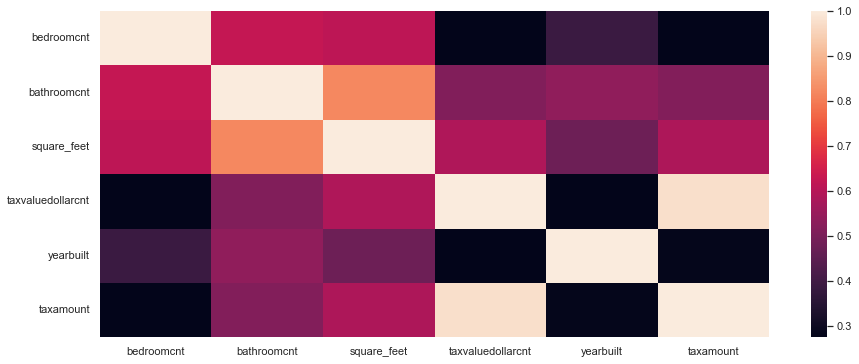

In [25]:
sns.heatmap(train.corr())  ### Don't understand how to read this yet.

[Text(0.5, 1.0, 'Average Value by Year Built')]

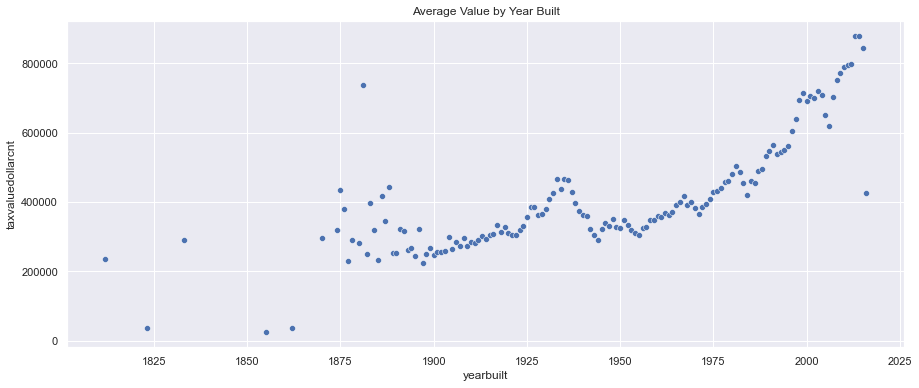

In [27]:
sns.scatterplot(data = train.groupby('yearbuilt').mean().taxvaluedollarcnt).set(title='Average Value by Year Built')

Seems that the newer the house the higher the cost of the home

[Text(0.5, 1.0, 'Average Value by Square Feet')]

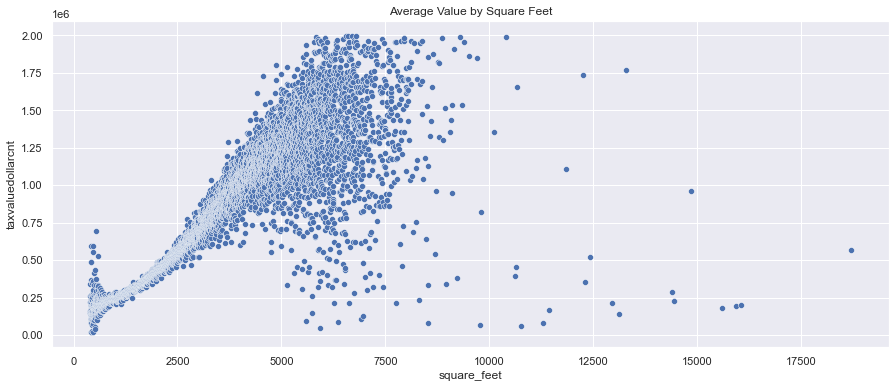

In [31]:
sns.scatterplot(data = train.groupby('square_feet').mean().taxvaluedollarcnt).set(title='Average Value by Square Feet')

Interesting one to look at. Definitely a positive correlation but starts to drop in value at the peak with some outliers. 

[Text(0.5, 1.0, 'Average Value by Number of Bedrooms')]

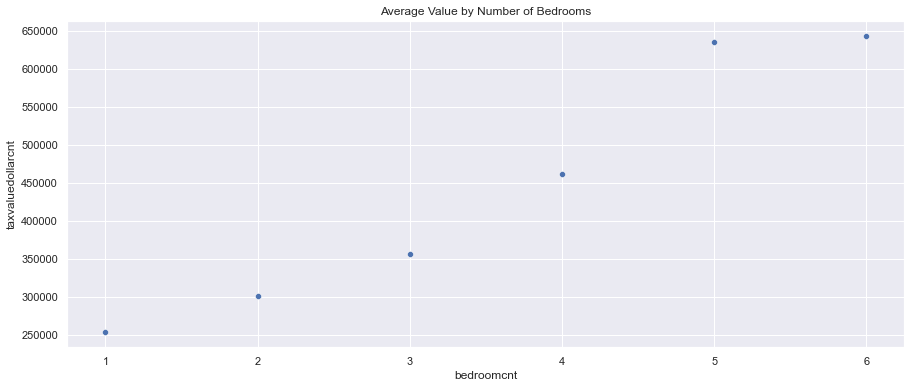

In [33]:
sns.scatterplot(data = train.groupby('bedroomcnt').mean().taxvaluedollarcnt).set(title='Average Value by Number of Bedrooms')

Positive correlation by bedrooms.

[Text(0.5, 1.0, 'Average Value by Number of Bathrooms')]

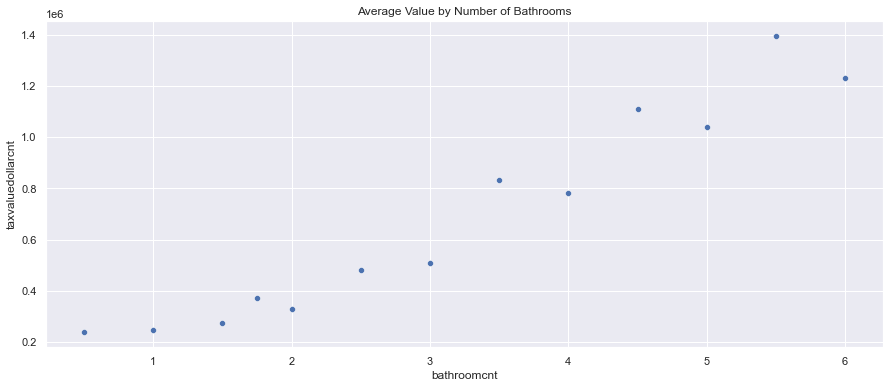

In [35]:
sns.scatterplot(data = train.groupby('bathroomcnt').mean().taxvaluedollarcnt).set(title='Average Value by Number of Bathrooms')

Positive correlation between bathroom amounts and house value. Less steady of an incline but incline regardless.

[Text(0.5, 1.0, 'Average Value by Tax Amount')]

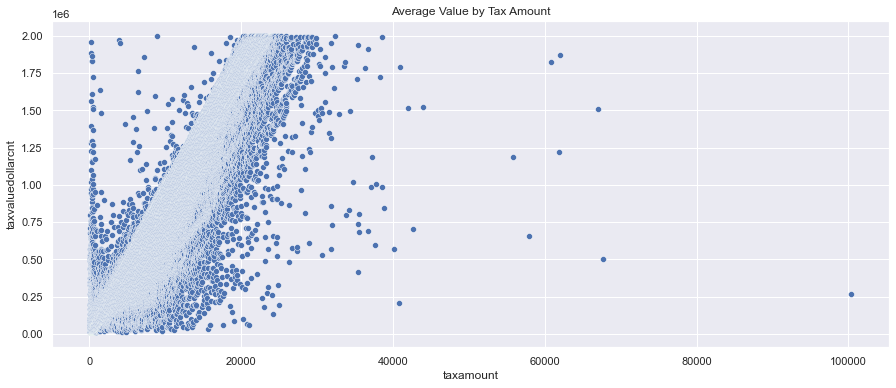

In [37]:
sns.scatterplot(data = train.groupby('taxamount').mean().taxvaluedollarcnt).set(title='Average Value by Tax Amount')